In [26]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(400, 700, 301)
R_scan = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values

air = ml.Non_Dispersion(1)

OC = lambda th: ml.Chromatic_Dispersion(th[6], th[7], 550)
SiN = lambda th: ml.Chromatic_Dispersion(th[8], th[9], 550)
SiO2 = lambda th: ml.Chromatic_Dispersion(th[10], th[11], 550)
ITO = lambda th: ml.Chromatic_Dispersion(th[12], th[13], 550)
sodalime = lambda th: ml.Chromatic_Dispersion(th[14], th[15], 550)

R_hypo = lambda th: tm.Design(
    [air, OC(th), SiN(th), SiO2(th), ITO(th), SiO2(th), SiN(th), sodalime(th)],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

R_hypo_tra = lambda th: tm.Design(
    [air, OC(th), SiN(th), SiO2(th), SiO2(th), SiN(th), sodalime(th)],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl, 5)

SEM = lambda th: abs(th[1]+th[2]-52.5)+abs(th[4]+th[5]-53.6)
IM =lambda th: sum(abs(R_hypo(th)-R_hypo_tra(th)))
FOM = lambda th: np.mean(abs(100*R_hypo(th)-R_scan)) + 100*IM(th)

In [27]:
sol = differential_evolution(
    FOM, [
        (1500,2500), # O.C
        (5,20), # T SiN
        (30,55), # T SiO2
        (20,30), # ITO
        (30,55), # B SiN
        (5,20), # B SiO2
        (1.52,1.58),(-0.2,0),
        (1.95,2.05),(-0.2,0),
        (1.48,1.52),(-0.2,0),
        (1.7,1.9),(-1,0),
        (1.5,1.6),(-0.2,0)
    ], disp = True, polish = False, popsize = 15, mutation = 0.3, recombination = 0.9, strategy = 'rand1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 110.725
differential_evolution step 2: f(x)= 110.725
differential_evolution step 3: f(x)= 96.7511
differential_evolution step 4: f(x)= 96.7511
differential_evolution step 5: f(x)= 96.7511
differential_evolution step 6: f(x)= 85.0516
differential_evolution step 7: f(x)= 85.0516
differential_evolution step 8: f(x)= 85.0516
differential_evolution step 9: f(x)= 85.0516
differential_evolution step 10: f(x)= 85.0516
differential_evolution step 11: f(x)= 84.7276
differential_evolution step 12: f(x)= 75.0732
differential_evolution step 13: f(x)= 75.0732
differential_evolution step 14: f(x)= 73.1351
differential_evolution step 15: f(x)= 65.754
differential_evolution step 16: f(x)= 65.754
differential_evolution step 17: f(x)= 65.754
differential_evolution step 18: f(x)= 65.754
differential_evolution step 19: f(x)= 65.754
differential_evolution step 20: f(x)= 58.0172
differential_evolution step 21: f(x)= 57.2809
differential_evolution step 22: f(x)= 57.2809
di

differential_evolution step 178: f(x)= 28.7997
differential_evolution step 179: f(x)= 28.796
differential_evolution step 180: f(x)= 28.796
differential_evolution step 181: f(x)= 28.796
differential_evolution step 182: f(x)= 28.796
differential_evolution step 183: f(x)= 28.796
differential_evolution step 184: f(x)= 28.796
differential_evolution step 185: f(x)= 28.796
differential_evolution step 186: f(x)= 28.796
differential_evolution step 187: f(x)= 28.796
differential_evolution step 188: f(x)= 28.796
differential_evolution step 189: f(x)= 28.796
differential_evolution step 190: f(x)= 28.7864
differential_evolution step 191: f(x)= 28.7864
differential_evolution step 192: f(x)= 28.7864
differential_evolution step 193: f(x)= 28.7007
differential_evolution step 194: f(x)= 28.7007
differential_evolution step 195: f(x)= 28.7007
differential_evolution step 196: f(x)= 28.7007
[ 1.56810443e+03  9.10815484e+00  3.13090947e+01  2.00122423e+01
  3.00440965e+01  7.85801653e+00  1.52177133e+00 -2.8

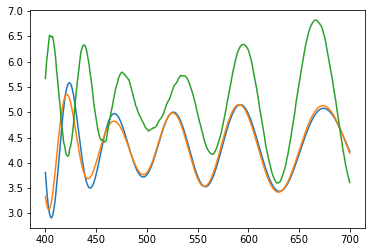

In [28]:
tk = sol.x
plt.plot(wl, 100*R_hypo(sol.x))
plt.plot(wl, 100*R_hypo_tra(sol.x))
plt.plot(wl, R_scan)
#plt.plot(wl, 100*R_hypo_tra(sol.x))
#print(np.mean(abs(100*R_hypo(tk)-100*R_hypo_tra(tk)))/np.mean(100*R_hypo(sol.x)))
plt.show()

In [13]:
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier') 
OC_LENS = ml.open_material('OC_LENS', 'Material')
HOC_LENS = ml.open_material('OC_HRI_LENS', 'Material')
sodalime_LENS = ml.open_material('sodalime', 'Material')
ITO_LENS = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN_LENS = ml.Cauchy([1.97812451, 0.0100578])
SiO2_LENS = ml.Cauchy([1.50818418, 0.00141496727])
sodalime_LENS = ml.Non_Dispersion(1.65)

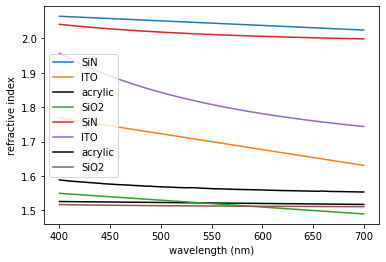

In [29]:
plt.plot(wl, SiN(tk).nvalues(wl), label = 'SiN')
plt.plot(wl, ITO(tk).nvalues(wl), label = 'ITO')
plt.plot(wl, OC(tk).nvalues(wl), '-k',label = 'acrylic')
plt.plot(wl, SiO2(tk).nvalues(wl), label = 'SiO2')
#plt.plot(wl, sodalime(tk).nvalues(wl))
plt.plot(wl, SiN_LENS.nvalues(wl), label = 'SiN')
plt.plot(wl, ITO_LENS.nvalues(wl), label = 'ITO')
plt.plot(wl, OC_LENS.nvalues(wl), '-k',label = 'acrylic')
plt.plot(wl, SiO2_LENS.nvalues(wl), label = 'SiO2')
#plt.plot(wl, sodalime_LENS.nvalues(wl))
plt.xlabel('wavelength (nm)')
plt.ylabel('refractive index')
plt.legend(loc = 'best')

#plt.savefig('LENS_material.png')
plt.show()

In [ ]:
x = 
print()